# NSL Notebook 06

## Exercise 06.1

Importing `M-*-blk.out` `G-*-blk.out` simulation results and plot it

In [1]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

In [2]:
# # # # Theoretical Curves # # # # #

T = np.linspace(0.5,2.0,num=100)
beta = 1/T
h=0.02
b = beta
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
U = -J*( th + ch*thN )/( 1 + thN )
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
C=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

# # # # Theoretical Curves # # # # #

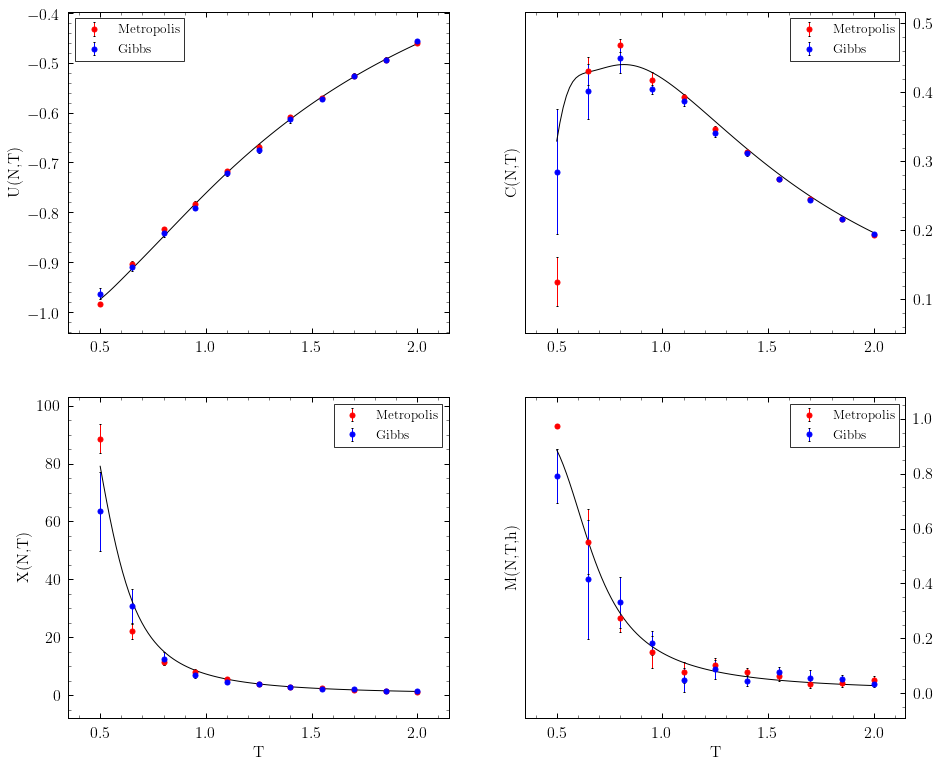

In [14]:

# load output file

th = "UCXM"
mt = "MG"
dth = dict()
dte = {'U': U, 'C': C, 'M': M, 'X': X}


for m in mt:
    dth[m] = dict()
    for var in th:
        if var == 'M':
            dth[m][var] = pd.read_csv(f"{m}-{var}-h-blk.csv", header=None, names=['T',var,'E'])
        else:
            dth[m][var] = pd.read_csv(f"{m}-{var}-blk.csv", header=None, names=['T',var,'E'])

fig, axes = plt.subplots(2, 2, figsize=(15,13));

axes = np.asarray(axes)
axes.shape = (1,4)
axes = axes[0]

for ax, var, i in zip(axes, dth['M'], range(len(th))):
    ax.plot(T, dte[var], '-k')
    if var != 'M':
        ax.set_ylabel(f"{var}(N,T)")
    else:
        ax.set_ylabel(f"{var}(N,T,h)")
    ax.set_xlabel("T") if (i == 2 or i == 3) else 0
    ax.yaxis.tick_right() if (i == 1 or i == 3) else 0
    for m in mt:
        cc = 'red' if m == 'M' else 'blue'
        ll = 'Metropolis' if m == 'M' else 'Gibbs'
        ax.errorbar(dth[m][var]['T'], dth[m][var][var], yerr=dth[m][var]['E'], marker='o', ms=5, ecolor=cc , mfc=cc, mec=cc, ls='', label=ll);
    ax.legend(fontsize='small');